![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

# Teste 2: Mais bisseção

Vamos continuar estudando o método de bisseção, agora com garantias de erros absolutos e relativos ao mesmo tempo.

## Questão 1: uma função auxiliar

Quando a bisseção retorna uma "raiz", ela dá o ponto médio de um intervalo $[a,b]$, onde temos certeza que há uma raiz de $f$.

Escreva uma função `absrel(a,b)` que, dado um intervalo $[a,b]$, retorna o maior erro absoluto e o maior erro relativo que pode ocorrer ao considerar que a raiz é o ponto médio deste intervalo.

In [1]:
import numpy as np
from numpy import infty

In [2]:
def absrel(a,b):
    raiz = (a + b) / 2
    abserr = max(
        abs(raiz - a),
        abs(raiz - b)
    )
    if a < 0 and b > 0:
        return abserr, +infty
    if a == 0:
        relerr = abs(abserr / b)
    elif b == 0:
        relerr = abs(abserr / a),
    else:
        relerr = max(
            abs(abserr / a),
            abs(abserr / b)
        )
    return abserr, relerr

In [3]:
absrel(10,11)

(0.5, 0.05)

In [4]:
assert absrel(1,2) == (.5, .5)
assert absrel(10,11) == (0.5, 0.05)

In [5]:
assert absrel(-2,1) == (1.5, +infty)

Porquê o erro relativo do intervalo $[-2,1]$ é infinito?

Dado que queremos que a função retorne o maior erro relativo, temos que quando o intervalo contém $0$, o divisor pode ser um número que tende a zero e, dessa forma, o valor do erro relativo tende a infinito.

## Questão 2: Outros retornos na bisseção

Modifique o método da bisseção para terminar quando o erro absoluto **e** o erro relativo
forem menores do que (ou iguais às) tolerâncias dadas em argumento.

Retorne uma tripla contendo, nesta ordem:
- uma estimativa para a raiz $z$,
- uma estimativa para o erro absoluto $e_{abs}$,
- uma estimativa para o erro relativo $e_{rel}$.

In [6]:
def bissecao(f, a: int, b: int, abstol: float = 1e-10, reltol: float = 1e-10) -> tuple:
    """
    Implementa o método da bisseção. O algoritmo para quando ambos os erros
    absoluto e relativo atingem valores menores que a tolerância.

    Args:
        f: Função que se buscará a raiz.
        a (int): Limite inferior do intervalo.
        b (int): Limite superior do intervalo.
        abstol (float, opcional): Tolerância para o erro absoluto. Por padrão, 1e-10.
        reltol (float, opcional): Tolerância para o erro relativo. Por padrão, 1e-10.

    Returns:
        tuple: Raiz, erro absoluto e erro relativo estimados.
    """
    raiz = (a+b)/2
    abserr, relerr = absrel(a, b)
    while abserr >= abstol or relerr >= reltol:
        if f(a)*f(raiz) < 0:
            b = raiz
        else:
            a = raiz
        raiz = (a+b)/2
        abserr, relerr = absrel(a, b)
    return raiz, abserr, relerr

Não se preocupe em obter valores iguais para as cotas superiores dos erros absoluto e relativo.

O importante é que estas estimativas sejam **coerentes** com os requisitos do método da bisseção:

- o erro absoluto real (ou seja, a diferença entre a raiz certa e a raiz calculada) deve ser menor do que a estimativa do erro absoluto,
- o erro relativo real deve ser menor do que a estimativa do erro relativo.

Note que é exatamente isso que vai ser testado em seguida!

In [7]:
bissecao(np.cos, 1,5)

(1.5707963267923333, 5.820766091346741e-11, 3.705614784221461e-11)

In [8]:
x,err,rel = bissecao(np.sin,1,5)

# Testando que o valor retornado está perto da resposta, e satisfaz as próprias estimativas
assert abs(x - np.pi)/np.pi < rel
assert abs(x - np.pi) < err

In [9]:
# Testando que sai pela razão certa
assert rel < 1e-10
assert err < 1e-10

In [10]:
def f(x):
    return ((x**2 - 2)**2 - 2)**2 - 2 - x

In [11]:
x,err,rel = bissecao(f,1.4,1.6,reltol=1e-12)

# Testando que o valor retornado está perto da resposta, e satisfaz as próprias estimativas
v = 1.532088886238
assert abs(x - v)/v < rel
assert abs(x - v) < err

In [12]:
# Testando que sai pela razão certa
assert err < 1e-10
assert rel < 1e-12

## Questão 3: extremidades da bisseção

Modifique a sua implementação da bisseção para retornar uma lista com os intervalos considerados,
em ordem decrescente.

In [13]:
def bissecao_extremidades(f, a: int, b: int, abstol: float = 1e-10, reltol: float = 1e-10) -> list:
    """
    Implementa o método da bisseção. O algoritmo para quando ambos os erros
    absoluto e relativo atingem valores menores que a tolerância.

    Args:
        f: Função que se buscará a raiz.
        a (int): Limite inferior do intervalo.
        b (int): Limite superior do intervalo.
        abstol (float, opcional): Tolerância para o erro absoluto. Por padrão, 1e-10.
        reltol (float, opcional): Tolerância para o erro relativo. Por padrão, 1e-10.

    Returns:
        list: Lista de extremidades da bisseção.
    """
    raiz = (a+b)/2
    abserr, relerr = absrel(a, b)
    extremidades = [(a,b)]
    while abserr >= abstol or relerr >= reltol:
        if f(a)*f(raiz) < 0:
            b = raiz
        else:
            a = raiz
        raiz = (a+b)/2
        abserr, relerr = absrel(a, b)
        extremidades.append((a,b))
    return extremidades

In [14]:
# Vendo alguns dos intervalos iniciais
l = bissecao_extremidades(np.sin,1,5)
for I in l[:5]:
    print(I)

(1, 5)
(3.0, 5)
(3.0, 4.0)
(3.0, 3.5)
(3.0, 3.25)


In [15]:
lista_intervalos = bissecao_extremidades(np.sin,100,103)

Ifinal = lista_intervalos[-1]
(af, bf) = Ifinal

assert abs(bf - af) <= 2e-10
assert 35 <= len(lista_intervalos) <= 40

In [16]:
lista_intervalos = bissecao_extremidades(np.sin,100,103, abstol=1e-12, reltol=1e-12)

Ifinal = lista_intervalos[-1]
(af, bf) = Ifinal

assert abs(bf - af) <= 2e-12
assert abs(af - 32*np.pi) <= 2e-12
assert abs(bf - 32*np.pi) <= 2e-12
assert 40 <= len(lista_intervalos) <= 45

In [17]:
lista_intervalos = bissecao_extremidades(f,-0.5,0, abstol=1e-8, reltol=1e-12)

(af, bf) = lista_intervalos[-1]
x = (af+bf)/2

v = -0.4450418679126287
assert(abs(x - v)/v < 1e-12)
assert(abs(x - v) < 1e-8)

In [18]:
lista_intervalos = bissecao_extremidades(f,-0.5,0, abstol=1e-8, reltol=1e-12)

(af, bf) = lista_intervalos[-1]
x = (af+bf)/2

assert 40 <= len(lista_intervalos) <= 45

## Questão 4: Gráficos

Faça o gráfico do tamanho dos intervalos, em função do número de iterações,
para a bisseção do cosseno entre 0 e 3, com as tolerâncias padrão.

In [19]:
import matplotlib.pyplot as plt

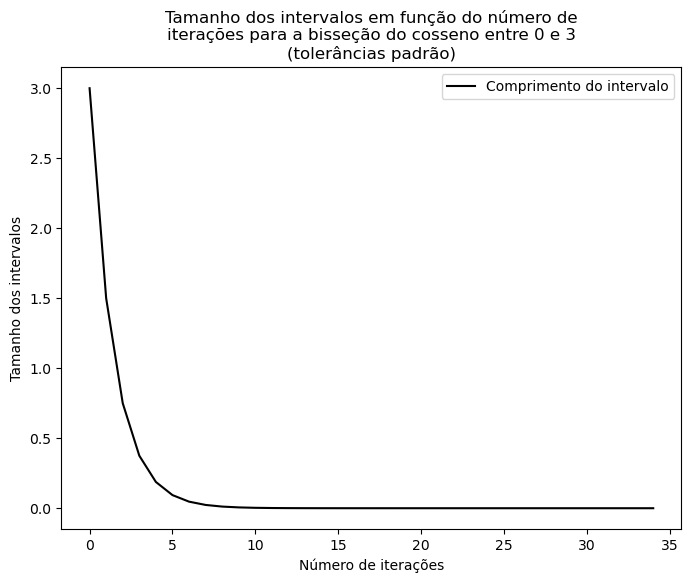

In [20]:
a, b = 0, 3

extremidades = bissecao_extremidades(np.cos, a, b)

x = range(len(extremidades))
y = [
    j - i
    for i, j in
    extremidades
]

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, color="black", label="Comprimento do intervalo")
ax.set_title("""Tamanho dos intervalos em função do número de
iterações para a bisseção do cosseno entre 0 e 3
(tolerâncias padrão)""")
ax.set_xlabel("Número de iterações")
ax.set_ylabel("Tamanho dos intervalos")
ax.legend()

# Não apague a linha abaixo, ela faz os assert's dos gráficos darem certo
ax = plt.gca()

In [21]:
assert len(ax.lines) == 1
assert len(ax.get_title()) >= 10

In [22]:
linha = ax.lines[0]
assert 5e-11 < min(linha.get_ydata()) < 2e-10
assert max(linha.get_ydata()) == 3

Agora, faça um gráfico com
- o comprimento dos intervalos
- a distância entre a extremidade inferior e a raiz correta
- a distância entre a extremidade superior e a raiz correta

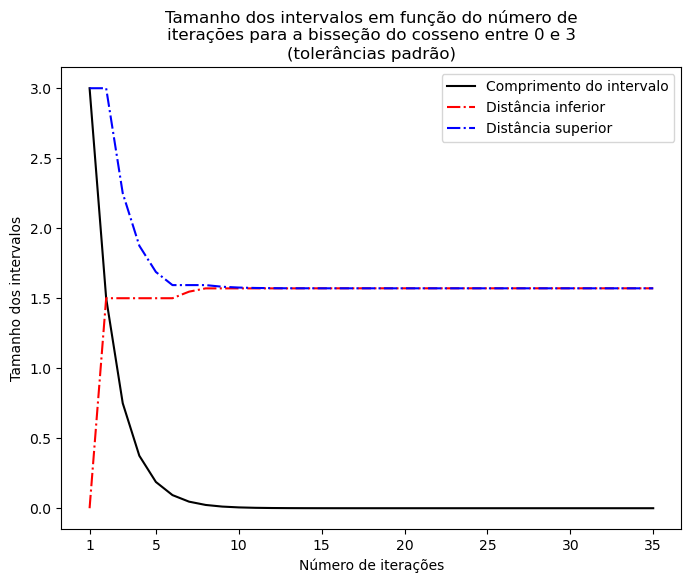

In [23]:
extremidades = bissecao_extremidades(np.cos, a, b)

x = range(1, len(extremidades)+1)
comprimento = [
    j - i
    for i, j in
    extremidades
]

raiz_correta = (extremidades[-1][0] - extremidades[-1][1]) / 2

distancia_inferior = []
distancia_superior = []
for i, j in extremidades:
    distancia_inferior.append(abs(raiz_correta - i))
    distancia_superior.append(abs(j - raiz_correta))


fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, comprimento, color="black", label="Comprimento do intervalo")
ax.plot(x, distancia_inferior, color="red", linestyle="dashdot", label="Distância inferior")
ax.plot(x, distancia_superior, color="blue", linestyle="dashdot", label="Distância superior")
ax.set_title("""Tamanho dos intervalos em função do número de
iterações para a bisseção do cosseno entre 0 e 3
(tolerâncias padrão)""")
ax.set_xlabel("Número de iterações")
ax.set_ylabel("Tamanho dos intervalos")
ax.set_xticks([1]+list(range(5,36,5)))
ax.legend()

ax = plt.gca()

In [24]:
assert len(ax.lines) == 3
assert len(ax.get_legend().texts) == 3

Repita o gráfico acima para o polinômio $f$ acima, com tolerância `1e-13`, tanto absoluta como relativa.

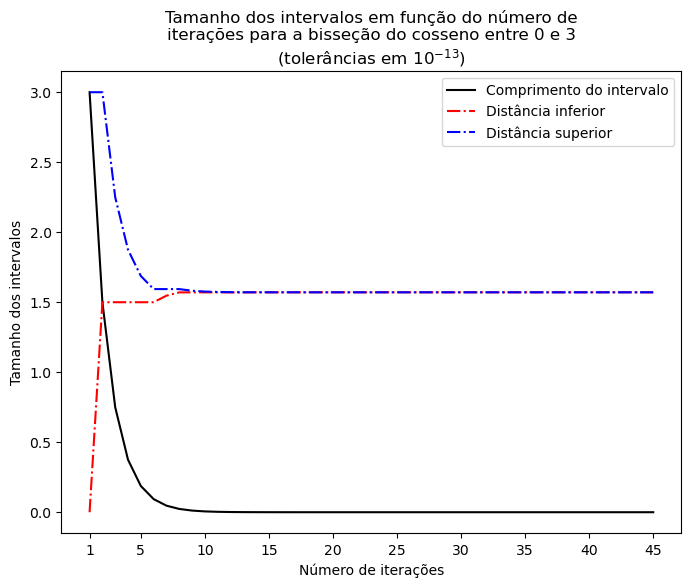

In [25]:
extremidades = bissecao_extremidades(np.cos, a, b, 1e-13, 1e-13)

x = range(1, len(extremidades)+1)
comprimento = [
    j - i
    for i, j in
    extremidades
]

raiz_correta = (extremidades[-1][0] - extremidades[-1][1]) / 2

distancia_inferior = []
distancia_superior = []
for i, j in extremidades:
    distancia_inferior.append(abs(raiz_correta - i))
    distancia_superior.append(abs(j - raiz_correta))


fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, comprimento, color="black", label="Comprimento do intervalo")
ax.plot(x, distancia_inferior, color="red", linestyle="dashdot", label="Distância inferior")
ax.plot(x, distancia_superior, color="blue", linestyle="dashdot", label="Distância superior")
ax.set_title("""Tamanho dos intervalos em função do número de
iterações para a bisseção do cosseno entre 0 e 3
(tolerâncias em $10^{-13}$)""")
ax.set_xlabel("Número de iterações")
ax.set_ylabel("Tamanho dos intervalos")
ax.set_xticks([1]+list(range(5,46,5)))
ax.legend()

ax = plt.gca()

In [26]:
assert len(ax.lines) == 3
assert len(ax.get_legend().texts) == 3

In [27]:
for l in ax.lines:
    assert 40 <= len(l.get_xdata()) <= 45

O que você observa de comum nos gráficos com relação aos erros entre as extremidades dos intervalos?

Como a mudança entre os dados ocorre por apenas por conta das tolerâncias, até a 35ª iteração os dados são iguais.